# Descriptive Statistics All in All:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

In [2]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [3]:
df=sns.load_dataset("healthexp")
df

,Year,Country,Spending_USD,Life_Expectancy
0,1970,Germany,252.311,70.6
1,1970,France,192.143,72.2
2,1970,Great Britain,123.993,71.9
3,1970,Japan,150.437,72.0
4,1970,USA,326.961,70.9
...,...,...,...,...
269,2020,Germany,6938.983,81.1
270,2020,France,5468.418,82.3
271,2020,Great Britain,5018.700,80.4
272,2020,Japan,4665.641,84.7


In [4]:
df['Year'] = pd.to_datetime(df['Year'], format='%Y')

### check the shape and size of the data.
Q. How many rows and columns are there in the dataset?

In [5]:
df.shape   #prints the rows and columns.

(274, 4)

In [6]:
# 274 rows and 4 columns are present in the dataset

In [7]:
df.size  # prints the rows*columns.

1096

### Check the columns names in the dataset
Q. What might be the columns name in the dataset?

In [8]:
df.columns

Index(['Year', 'Country', 'Spending_USD', 'Life_Expectancy'], dtype='object')

### check the categorical and numerical columns in the dataset.
Q. How many columns are categorical and how many are numerical?

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 274 entries, 0 to 273
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Year             274 non-null    datetime64[ns]
 1   Country          274 non-null    object        
 2   Spending_USD     274 non-null    float64       
 3   Life_Expectancy  274 non-null    float64       
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 8.7+ KB


In [10]:
# 3 numerical columns and 1 categorical column are present.

In [11]:
num_col=df.select_dtypes(include='number').columns
len(num_col)

2

In [12]:
cat_col=df.select_dtypes(include=['object','category']).columns
len(cat_col)

1

### check the maximum and minimum values in each columns.
* 1.Q. What might be the maximum and minimum values in each column in the dataset?
* 2.Q. in which year the spending is maximum?
* 3.Q. Which country spends the most?
* 4.Q. What is the highest life expectancy rate and which country holds that title?

In [13]:
# 1.Q 
df['Spending_USD'].max(),df['Spending_USD'].min()

(11859.179, 123.993)

In [14]:
df['Life_Expectancy'].max(),df['Life_Expectancy'].min()

(84.7, 70.6)

In [15]:
for i in num_col:
    print(f"{i}: Maximum = {df[i].max()}, Minimum = {df[i].min()}")

Spending_USD: Maximum = 11859.179, Minimum = 123.993
Life_Expectancy: Maximum = 84.7, Minimum = 70.6


In [16]:
# 2.Q.
df.groupby('Country')['Spending_USD'].max().sort_values(ascending=False)

Country
USA              11859.179
Germany           6938.983
Canada            5828.324
France            5468.418
Great Britain     5018.700
Japan             4665.641
Name: Spending_USD, dtype: float64

In [17]:
df.groupby('Country')['Life_Expectancy'].max().sort_values(ascending=False)

Country
Japan            84.7
France           82.9
Canada           82.2
Great Britain    81.4
Germany          81.3
USA              78.9
Name: Life_Expectancy, dtype: float64

In [18]:
df.groupby('Year')['Spending_USD'].max().sort_values(ascending=False).head()

Year
2020-01-01    11859.179
2019-01-01    10855.517
2018-01-01    10451.386
2017-01-01    10046.472
2016-01-01     9717.649
Name: Spending_USD, dtype: float64

### check the central tendency of the dataset:

In [19]:
df['Spending_USD'].mean()

2789.338905109489

In [20]:
df['Spending_USD'].median()

2295.578

In [21]:
df['Life_Expectancy'].mean()

77.90948905109488

In [22]:
df['Life_Expectancy'].median()

78.1

### check the spread of the data:

In [23]:
df['Spending_USD'].var()

4817760.659071588

In [24]:
df['Spending_USD'].std()

2194.9397848395724

In [25]:
df['Life_Expectancy'].var()

10.733902302077485

In [26]:
df['Life_Expectancy'].std()

3.276263466523638

### check the skewness of the data:

In [27]:
df['Spending_USD'].skew(), df['Spending_USD'].kurt()  # right skewed

(1.306575640881669, 2.10197678611689)

In [28]:
df['Life_Expectancy'].skew(), df['Life_Expectancy'].kurt()  # left skewed

(-0.20233768373091185, -0.7158322207791485)

In [47]:
mean=df['Spending_USD'].mean()
median=df['Spending_USD'].median()

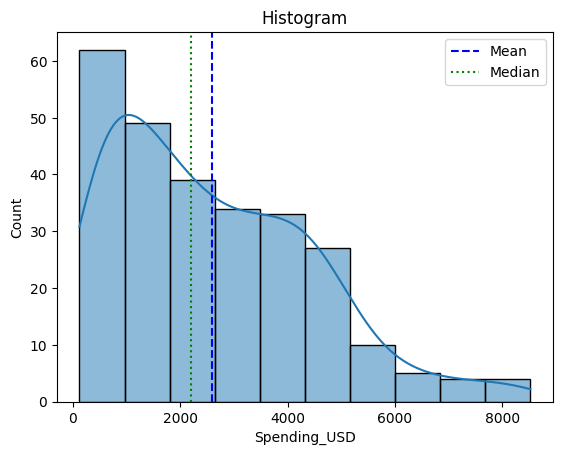

In [49]:
sns.histplot(data=df,x='Spending_USD',kde=True)
plt.axvline(mean, color='blue', linestyle='--', label='Mean')
plt.axvline(median, color='green', linestyle=':', label='Median')
plt.title(f"Histogram")
plt.legend()

<Axes: xlabel='Life_Expectancy', ylabel='Count'>

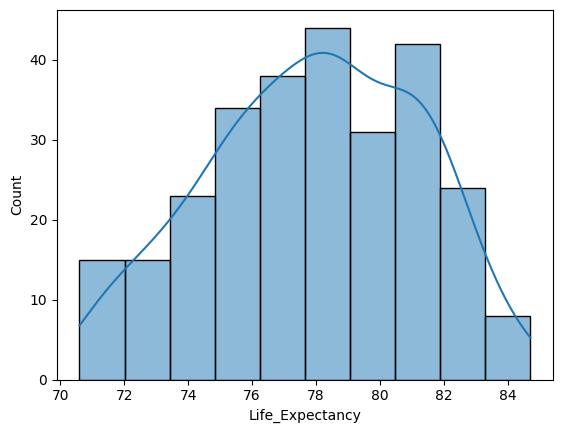

In [30]:
sns.histplot(data=df,x='Life_Expectancy',kde=True)

### check the quantile:

In [31]:
df['Spending_USD'].quantile(0.75),df['Spending_USD'].quantile(0.5),df['Spending_USD'].quantile(0.25)

(4055.61, 2295.578, 1038.357)

In [32]:
df['Life_Expectancy'].quantile(0.75),df['Life_Expectancy'].quantile(0.5),df['Life_Expectancy'].quantile(0.25)

(80.57499999999999, 78.1, 75.525)

In [33]:
q1=np.percentile(df['Spending_USD'],25)
q1

1038.357

In [34]:
q3=np.percentile(df['Spending_USD'],75)
q3

4055.61

In [35]:
IQR=q3-q1
IQR

3017.253

In [36]:
lower_bound=q1-1.5*IQR
upper_bound=q3+1.5*IQR
print(lower_bound,upper_bound)

-3487.5225 8581.4895


<Axes: >

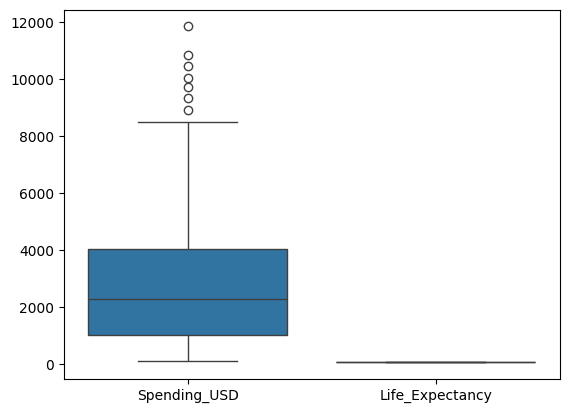

In [37]:
sns.boxplot(data=df)

<Axes: ylabel='Life_Expectancy'>

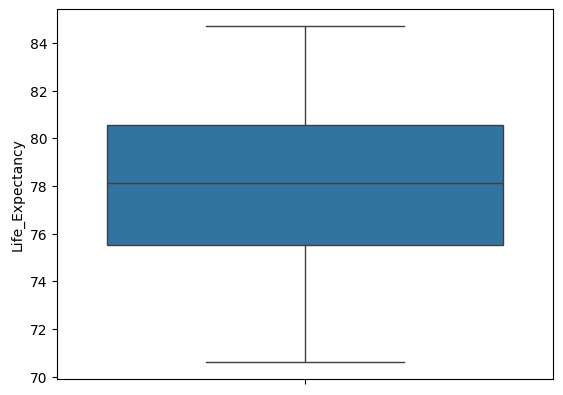

In [38]:
sns.boxplot(df['Life_Expectancy'])

In [39]:
df = df[(df['Spending_USD'] >= lower_bound) & (df['Spending_USD'] <= upper_bound)]

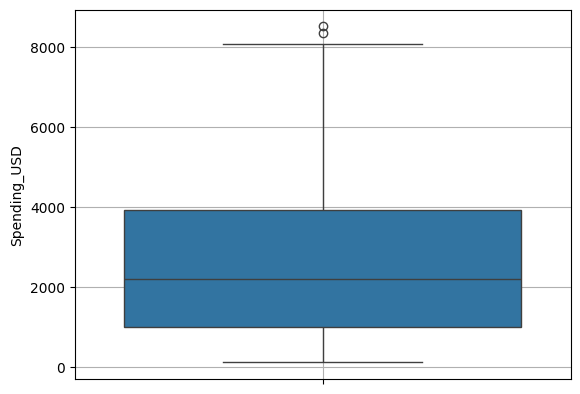

In [40]:
sns.boxplot(df['Spending_USD'])
plt.grid()

In [41]:
df = df[(df['Spending_USD'] >= q1 - 3*IQR) &(df['Spending_USD'] <= q3 + 3*IQR)]

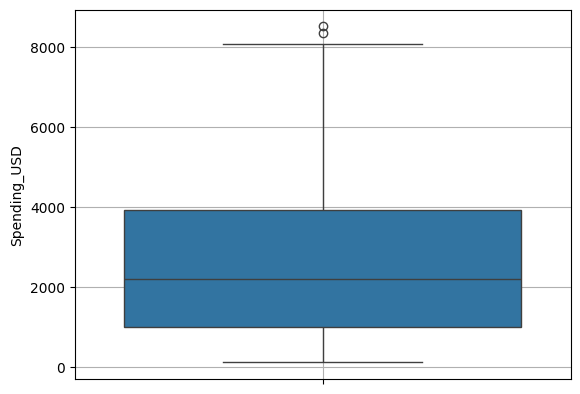

In [42]:
sns.boxplot(df['Spending_USD'])
plt.grid()

In [43]:
df['Spending_USD'] = df['Spending_USD'].clip(lower_bound, upper_bound)

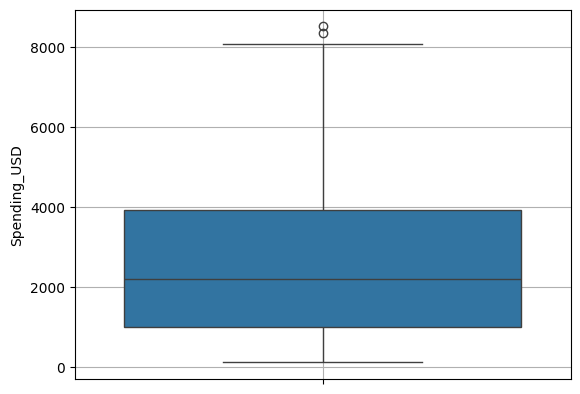

In [44]:
sns.boxplot(df['Spending_USD'])
plt.grid()

### correlation(showing relationship)

In [45]:
df['Spending_USD'].corr(df['Life_Expectancy'])

0.6774375461992606

### describe method

In [50]:
df.describe()

,Year,Spending_USD,Life_Expectancy
count,267,267.000000,267.000000
mean,1996-06-20 08:43:08.764044928,2595.759026,77.894382
min,1970-01-01 00:00:00,123.993000,70.600000
25%,1985-01-01 00:00:00,1017.980000,75.500000
50%,1997-01-01 00:00:00,2200.468000,78.100000
75%,2008-01-01 00:00:00,3920.077500,80.600000
max,2020-01-01 00:00:00,8519.620000,84.700000
std,NaN,1857.495574,3.316252


In [52]:
df['Country'].describe(include=['object','category'])

count       267
unique        6
top       Japan
freq         51
Name: Country, dtype: object

In [53]:
df['Country'].value_counts()

Country
Japan            51
Germany          50
USA              44
Canada           44
Great Britain    43
France           35
Name: count, dtype: int64

Q. Which country spends the most money for life Expectancy or health?

In [56]:
df.groupby('Country')['Spending_USD'].max().sort_values(ascending=False)

Country
USA              8519.620
Germany          6938.983
Canada           5828.324
France           5468.418
Great Britain    5018.700
Japan            4665.641
Name: Spending_USD, dtype: float64

In [ ]:
# USA is spending its large sum of money for its health. while japan spends least.

Q. Is spending increasing the life expectancy?

In [57]:
df.groupby('Country')['Life_Expectancy'].max().sort_values(ascending=False)

Country
Japan            84.7
France           82.9
Canada           82.2
Great Britain    81.4
Germany          81.3
USA              78.8
Name: Life_Expectancy, dtype: float64

No, Spending large amount is not improving life Expectancy of people. but tends to reverse on conditions. That means, there is only spending but not creation of public awareness and money is not well utilised in improving health standards.